<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_p_466_~_486%2C_ch8_1~3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**01 텍스트 분석 이해**
- 텍스트 분석:비정형 데이터인 텍스트를 분석하는 것
- 텍스트를 word기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현될 수 있는데 이 텍스트 변환을 피처 벡터화 또는 피처추출이라고 한다.

**텍스트 분석 수행 프로세스**
1. 텍스트 사전준비작업: 텍스트를 피처로 만들기전 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징작업. 단어등의 토큰화 작업, 의미없는 단어 제거작업, 어근추출 등의 텍스트 정규화 작업을 수행
2. 피처 벡터화/추출: 사전준비 작업으로 가공된 텍스트에서 피처를 추출하고 벡터값 할당. BOW해당
3. ML모델 수립 및 학습/예측/평가: 피처 벡터화된 데이터세트에 ML모델을 적용해 학습/예측 및 평가 수행

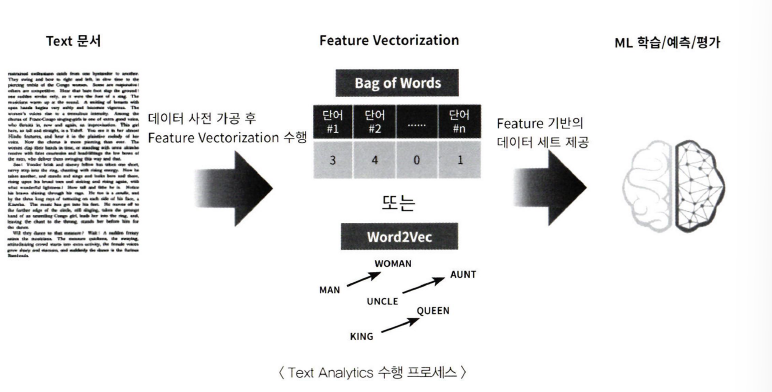


**파이썬 기반의 NLP, 텍스트분석 패키지**
- NLTK: 파이썬의 대표적 NLP패키지. 방대한 데이터세트와 서브모듈을 가지고 있어 NLP영역 모두 커버하고 있다.
- Gensim: 토픽 모델링 분야에서 가장 두각을 나타내는 패키지.
- SapCy: 뛰어난 수행 성능가짐.

###**텍스트 사전준비작업(텍스트 전처리)-텍스트 정규화**
- 클렌징: 텍스트분석에 방해되는 문자, 기호 제거
- 토큰화: 문장 분리하는 문장토큰화와 문장에서 단어를 토큰으로 분리하는 단어 토큰화
- 필터링, 스톱워드제거, 철자수정
- stemming
- Lemmatization

- 문장토큰화: 문장의 마침표, 개행문자 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것.
- NTLK에서 주로 사용하는 sent_tokenize로 토큰화 진행

In [1]:
# 문장 토큰화
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
You can see is out your window or on you television. \
You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see is out your window or on you television.', 'You feel it when you go to work, or go to church or pay your taxes.']


- 단어토큰화:공백, 콤마, 마침표, 개행문자로 단어를 분리하지만 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행

In [2]:
#단어 토큰화
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [3]:
from nltk import word_tokenize, sent_tokenize

def tokenize_text(text):

  sentences = sent_tokenize(text)
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'is', 'out', 'your', 'window', 'or', 'on', 'you', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


**스톱워드 제거**
- 분석에 큰 의미가 없는 단어를 지칭
- 문장을 구성하는 필수 문법요소이지만 문맥적으로 큰 의미가 없다.
- but 빈번하게 등장하여 중요한 단어로 인식할 수 있어 제거하는것이 좋음



In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# 몇개의 stopwords가 있는지 알아보기
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [6]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens=[]
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words=[]
  # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반목문
  for word in sentence:
    # 소문자로 모두 변환합니다.
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


**Stemming과 Lemmatization**
- 문장의 문법적 요소가 많은데 문법적 혹은 의미적으로 변화하는 단어의 원형을 찾는 방법
- stemming은 원형 단어로 변환시 일반적 방법을 적용하거나 단순화된 방법을 적용
- lemmatization은 품사와 같은 문법적 요소와 더 의미적인 부분을 감안해 정확한 철자로된 어근단어를 찾아준다.


In [7]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [8]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'), lemma.lemmatize('amuses','v'), lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'), lemma.lemmatize('happiset','a'))
print(lemma.lemmatize('fancier','a'), lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happiset
fancy fancy


###**BOW**
- 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도값을 부여해 피처값을 추출하는 모델

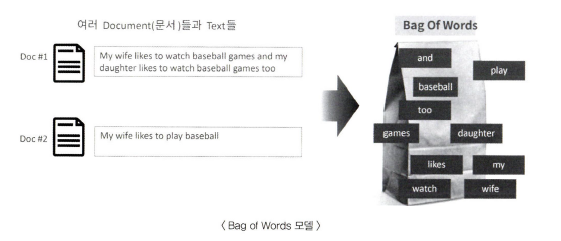

- BOW모델의 장점: 빠르고 쉬운 구축
- BOW모델의 단점: 문맥의미 반영부족, 희소행렬문제

**BOW피처 벡터화**
- 피처벡터화: 텍스트는 특정의미를 갖는 숫자형 값인 벡터값으로 변환해야하는것. 넓은 범위의 피처추출에 포함
- - 카운트기반의 벡터화: 단어 피처에 값을 부여할 때 각 문서에서 해당하는 단어가 나타나는 횟수
- - TF-IDF기반의 벡터화: 문장에서 자주사용되는 단어도 높은 값을 부여하는 것을 보완하기 위해 사용


**BOW벡터화를 위한 희소행렬**
- 대규모 행렬의 대부분 값을 0이 차지하는 행렬을 희소행렬이라고 한다.
- BOW형태를 가진 언어모델의 피처벡터화는 대부분 희소행렬

**희소행렬-COO형식**
- 0이아닌 데이터만 별도의 데이터배열에 저장하고 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식이다.

In [9]:
import numpy as np
dense = np.array([[3,0,1],[0,2,0]])

In [10]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data,(row_pos, col_pos)))

In [11]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

**희소행렬-CSR형식**
- COO형식이 행과 열의 위치를 나타내기 위해 반복적 위치 데이터를 사용해야하는 문제점을 해결한 방식이다.

In [12]:
# 희소행렬 (CSR 형식)
'''COO가 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식'''

from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [13]:
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])


coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)